In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [180]:
class LinearRegressionM():
  def __init__(self, n_epochs=100 ,method="batch", lr=0.01):
    self.n_epochs, self.method, self.lr = n_epochs, method, lr


  def mse(self, X, y):
    preds = np.dot(X, self.w.T)
    cost = (preds - y) ** 2
    cost = np.sum(cost)
    return cost / self.m

  def predict(self, X):
    ones = np.ones((X.shape[0], 1))
    added_X = np.hstack((ones,X))
    # return self.w
    return added_X @ self.w.T

  def batch(self, X, y):
    ones = np.ones((X.shape[0], 1))
    added_X = np.hstack((ones,X))

    self.m = added_X.shape[0]
    self.w = np.random.randn(1, added_X.shape[1]) * 0.01

    for epoch in range(self.n_epochs):

      d_w = (2/self.m) * added_X.T @ ((added_X @ self.w.T) - y)
      self.w -= self.lr * d_w.T

    self.coef_ = self.w[:, 1:]
    self.intercept_ = self.w[:, 0]

  def fit(self,X, y):
    if self.method == "batch":
      self.batch(X, y)
    return self.w

In [196]:
np.random.seed(42)
m = 1000
X = 2 + np.random.rand(m, 1)
y = 7 + 5 * X + np.random.randn(m,1)

In [242]:
my_model = LinearRegressionM(n_epochs=1000, lr = 0.1)
my_model.fit(X, y)

# Get the weights (coefficients) and intercept
my_weights = my_model.coef_
my_intercept = my_model.intercept_

my_y = my_model.predict(X)

print(f"Weights: {my_weights}")
print(f"Intercept: {my_intercept}")

Weights: [[5.02764503]]
Intercept: [7.02466528]


In [243]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
sk_model = LinearRegression()
sk_model.fit(X, y)

# Get the weights (coefficients) and intercept
weights = sk_model.coef_
intercept = sk_model.intercept_

sk_y = sk_model.predict(X)

print(f"Weights: {weights}")
print(f"Intercept: {intercept}")


Weights: [[4.84521484]]
Intercept: [7.48435058]


In [244]:
from sklearn.metrics import mean_squared_error

my_mse = mean_squared_error(y, my_y)
sk_mse = mean_squared_error(y, sk_y)

print(f"My Mean Squared Error: {my_mse}")
print(f"Sk Mean Squared Error2: {sk_mse}")

My Mean Squared Error: 0.9778343871574016
Sk Mean Squared Error2: 0.9749678817794579


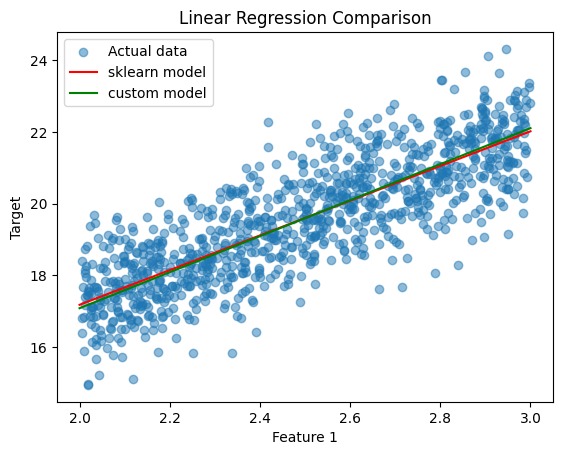

In [245]:
plt.scatter(X[:, 0], y, alpha=0.5, label='Actual data')

plt.plot(np.linspace(2, 3, 50).reshape(-1, 1), sk_model.predict(np.linspace(2, 3, 50).reshape(-1, 1)), 'r', label='sklearn model')

plt.plot(np.linspace(2, 3, 50).reshape(-1, 1), my_model.predict(np.linspace(2, 3, 50).reshape(-1, 1)), 'g', label='custom model')

plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Linear Regression Comparison')
plt.legend()

plt.show()